In [454]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist15_df
import datetime
import pandas as pd

In [701]:
session = get_session()
past_time = datetime.datetime.utcnow() - datetime.timedelta(weeks=2)
df = get_recent_hist15_df(past_time, session)
df

,price,size,exec_date
0,1.650248e+06,91.089499,2017-12-30 09:30:00
1,1.647538e+06,123.170039,2017-12-30 09:45:00
2,1.644997e+06,126.330209,2017-12-30 10:00:00
3,1.634533e+06,168.890786,2017-12-30 10:15:00
4,1.638348e+06,164.844256,2017-12-30 10:30:00
5,1.638104e+06,110.757017,2017-12-30 10:45:00
6,1.639957e+06,134.526014,2017-12-30 11:00:00
7,1.648133e+06,134.847782,2017-12-30 11:15:00
8,1.647495e+06,99.977244,2017-12-30 11:30:00
9,1.648316e+06,79.101748,2017-12-30 11:45:00


In [310]:
def zs(p, n, shift=0):
    return (p.shift(0) - p.rolling(n).mean()) / p.rolling(n).std()


def avg(p, n):
    return p.rolling(n).mean()


def std(p, n):
    return p.rolling(n).std()

In [702]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')

In [703]:
bench_price = df.price
bench_size = df['size']
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

dfb['pma12'] = zs(p / avg(p, 12) - 1, 96)
dfb['pma96'] = zs(p / avg(p, 96) - 1, 96)
dfb['pma672'] = zs(p / avg(p, 672) - 1, 96)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, 96)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, 96)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), 96)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), 96)

dfb['vma12'] = zs(v / avg(v, 12) - 1, 96)
dfb['vma96'] = zs(v / avg(v, 96) - 1, 96)
dfb['vma672'] = zs(v / avg(v, 672) - 1, 96)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)

r_label_list = [
    'r', 'r_1', 'r_2',
]
for r_label in r_label_list:
    dfb[r_label] = 0
dfb['state'] = 0

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['vol12'] = zs(std(p, 12), 96)
dfb['vol96'] = zs(std(p, 96), 96)
dfb['vol672'] = zs(std(p, 672), 96)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), 96)

# for i in range(96):
#     dfb['pZ96_s%02d' % i] = zs(p, 96, shift=i)

dfb['utctime'] = (dfb.index.hour * 4 + dfb.index.minute / 15) / 96

dfz = dfb

indicator = dfz.reset_index().loc[:, 'pma12':'utctime']
price_history = dfz.reset_index().price

indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [704]:
answer = price_history.shift(-1) / price_history - 1
answer = (answer > 0.0005) * 1 - (answer < -0.0005) * 1 + 1

indexer = indicator.dv96_672.notnull()

In [705]:
import numpy as np
d_exp = indicator.loc[indexer]
d_obj = answer[indexer]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.int32)

In [149]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList, cuda
import chainer.functions as F
import chainer.links as L

In [690]:
row, col = d_exp.shape

ls_1 = 500
ls_2 = 1000
ls_3 = 1000
ls_4 = 200
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, ls_4),
            l5=L.Linear(ls_4, out_size)
        )
    
    def __call__(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        h4 = F.sigmoid(self.l4(h3))
        o = self.l5(h4)
        return o

In [667]:
model = MyChain()
serializers.load_npz('agent/predictor.npz', model)

In [706]:
res = model(data).data
res

array([[-0.01165515,  0.18259469, -0.45058033],
       [ 0.08642299,  0.09140671, -0.44268787],
       [ 0.12753001, -0.04185789, -0.33658364],
       ..., 
       [-0.11335438,  0.04021586, -0.18771389],
       [-0.17944878,  0.00759826, -0.09441117],
       [ 0.01090199, -0.23388705, -0.02046609]], dtype=float32)

In [707]:
result = d_obj.reset_index()
result['predict'] = res.argmax(axis=1)
result

,index,price,predict
0,861,0,1
1,862,0,1
2,863,1,0
3,864,2,0
4,865,0,0
5,866,0,0
6,867,0,0
7,868,1,0
8,869,2,2
9,870,0,2


In [693]:
test = result.loc[:]
test[test.price == test.predict].shape

(219, 3)

In [694]:
result.groupby(['price', 'predict']).size()

price  predict
0      0           93
       1           14
       2          117
1      0           17
       1            2
       2           29
2      0           67
       1            4
       2          124
dtype: int64

In [695]:
price_test = price_history[indexer]

In [696]:
price_test

861     1.938781e+06
862     1.936680e+06
863     1.927813e+06
864     1.923332e+06
865     1.918679e+06
866     1.918846e+06
867     1.923303e+06
868     1.902017e+06
869     1.890432e+06
870     1.872534e+06
871     1.872935e+06
872     1.881352e+06
873     1.879051e+06
874     1.882814e+06
875     1.892396e+06
876     1.900684e+06
877     1.887150e+06
878     1.886736e+06
879     1.886960e+06
880     1.892177e+06
881     1.866241e+06
882     1.839771e+06
883     1.840087e+06
884     1.840275e+06
885     1.847959e+06
886     1.849084e+06
887     1.825649e+06
888     1.803386e+06
889     1.822275e+06
890     1.836016e+06
            ...     
1298    1.656758e+06
1299    1.668442e+06
1300    1.665636e+06
1301    1.662962e+06
1302    1.659575e+06
1303    1.662617e+06
1304    1.671797e+06
1305    1.680006e+06
1306    1.684153e+06
1307    1.687359e+06
1308    1.692356e+06
1309    1.687023e+06
1310    1.681672e+06
1311    1.704873e+06
1312    1.716941e+06
1313    1.720201e+06
1314    1.722

In [697]:
from matplotlib import pyplot as plt
%matplotlib inline

jpy = 40000
btc = 0
com = 0.15 / 100
x = []
y_p = []
y_jpy = []
sz_all = price_test.size
begin = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc

39210.047305432243

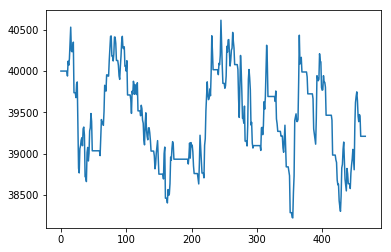

In [698]:
plt.plot(x, y_jpy)

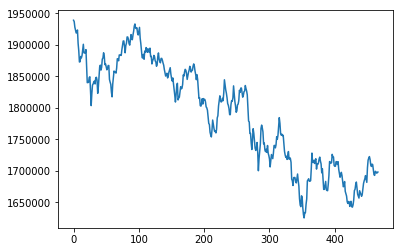

In [699]:
plt.plot(x, y_p)

In [67]:
exp_single = [indicator.loc[1000]]
data_single = np.array(exp_single, dtype=np.float32)
data_single

array([[-0.10468615, -0.24378949,  1.17827272,  0.31623939, -0.18529482,
        -0.30773506, -0.22841381, -0.77849382, -0.74054968, -0.65952748,
        -1.2418139 , -0.67521131, -0.88793594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.68722892,  1.45043373, -0.45318955,
         0.09282427,  1.86361432, -0.63901508,  0.07308167,  0.70833331]], dtype=float32)

In [47]:
test.price.shift(0)

1060    2
1061    0
1062    1
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    2
1074    2
1075    0
1076    0
1077    0
1078    1
1079    0
1080    2
1081    2
1082    2
1083    2
1084    2
1085    2
1086    0
1087    0
1088    2
1089    2
       ..
1126    0
1127    0
1128    0
1129    0
1130    0
1131    0
1132    1
1133    0
1134    0
1135    2
1136    2
1137    0
1138    0
1139    0
1140    0
1141    2
1142    2
1143    0
1144    0
1145    2
1146    2
1147    2
1148    2
1149    2
1150    0
1151    0
1152    0
1153    2
1154    0
1155    1
Name: price, Length: 96, dtype: int32